## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tenso

In [2]:
train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

# Regularizers

In [4]:
# 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
RATIO = [1e-2, 1e-6]
Dropout_EXP = [0.25,0.1]

In [8]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], ratio=1e-2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in RATIO:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = ('l1 regularizer/ratio=',regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instru

50000/50000 [==============================] - 14s 271us/step - loss: 2.4626 - accuracy: 0.0982 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.4626 - accuracy: 0.0981 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.4626 - accuracy: 0.0968 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.4626 - accuracy: 0.0979 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 14s 272us/step - loss: 2.4626 - accuracy: 0.0966 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.4626 - accuracy: 0.0983 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 14s 270us/step - loss: 2.4626 - accuracy: 0.0975 - va

50000/50000 [==============================] - 13s 265us/step - loss: 1.0428 - accuracy: 0.6449 - val_loss: 1.4483 - val_accuracy: 0.5146
Epoch 42/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.0254 - accuracy: 0.6532 - val_loss: 1.3879 - val_accuracy: 0.5333
Epoch 43/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.0143 - accuracy: 0.6550 - val_loss: 1.3810 - val_accuracy: 0.5352
Epoch 44/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.0007 - accuracy: 0.6612 - val_loss: 1.4499 - val_accuracy: 0.5141
Epoch 45/50
50000/50000 [==============================] - 13s 264us/step - loss: 0.9943 - accuracy: 0.6629 - val_loss: 1.4060 - val_accuracy: 0.5300
Epoch 46/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.9810 - accuracy: 0.6687 - val_loss: 1.4800 - val_accuracy: 0.5162
Epoch 47/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.9655 - accuracy: 0.6754 - va

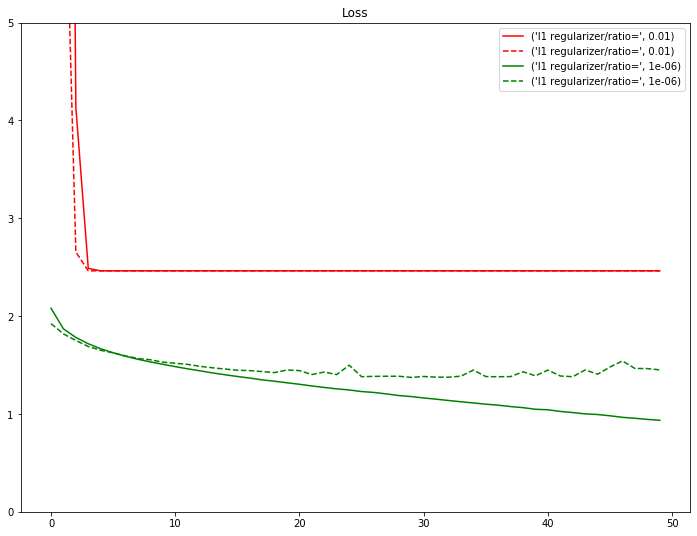

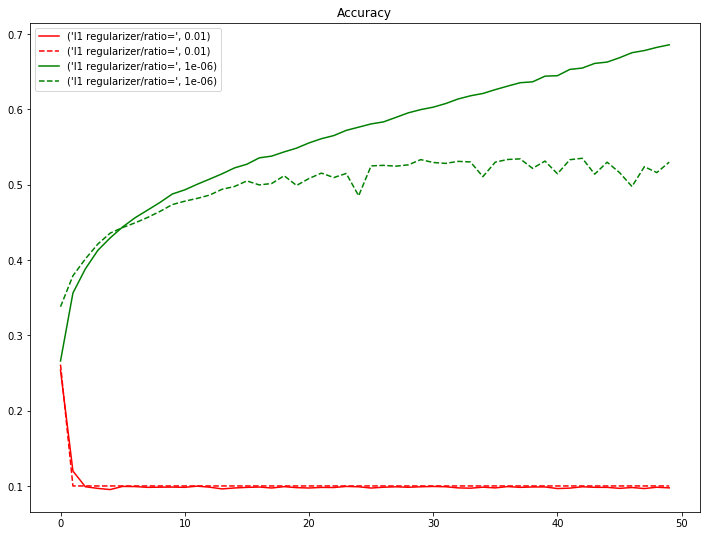

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k",'c','orange']

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# Dropout

In [13]:
Dropout_EXP = [0.25,0.1]

In [14]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.25):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Dropout rate = %.2f" % (dropout_))
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
        
    exp_name_tag = ('dropout rate=',dropout_)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Dropout rate = 0.25
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128

Epoch 46/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.4823 - accuracy: 0.4658 - val_loss: 1.4466 - val_accuracy: 0.4821
Epoch 47/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.4709 - accuracy: 0.4721 - val_loss: 1.4228 - val_accuracy: 0.4978
Epoch 48/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.4715 - accuracy: 0.4706 - val_loss: 1.4273 - val_accuracy: 0.4946
Epoch 49/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.4647 - accuracy: 0.4739 - val_loss: 1.4402 - val_accuracy: 0.4899
Epoch 50/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.4688 - accuracy: 0.4731 - val_loss: 1.4662 - val_accuracy: 0.4807
Dropout rate = 0.10
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________

Epoch 41/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.2148 - accuracy: 0.5593 - val_loss: 1.3623 - val_accuracy: 0.5175
Epoch 42/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.2159 - accuracy: 0.5602 - val_loss: 1.3609 - val_accuracy: 0.5212
Epoch 43/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.2040 - accuracy: 0.5645 - val_loss: 1.3543 - val_accuracy: 0.5264
Epoch 44/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.1924 - accuracy: 0.5710 - val_loss: 1.3420 - val_accuracy: 0.5230
Epoch 45/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.1924 - accuracy: 0.5691 - val_loss: 1.3516 - val_accuracy: 0.5222
Epoch 46/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.1875 - accuracy: 0.5718 - val_loss: 1.3503 - val_accuracy: 0.5207
Epoch 47/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.1845 - accuracy:

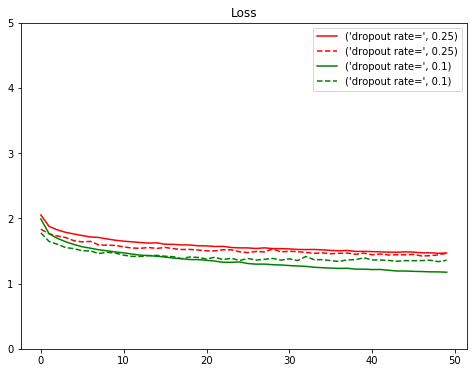

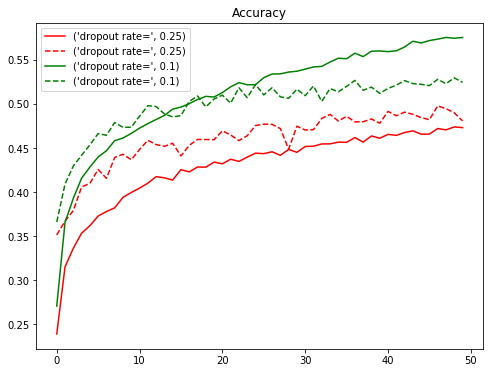

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()